# Home assignment 1: Kalman filter

Imagine a robot. Robot state is described with the following parameters

1. $x$, $y$ - robot coordinates,
2. $V_x$, $V_y$ - velocities.

We can only measure the coordinates of the robot, which should be reflected in the $ H $ matrix.

In this homework assignment:
- Fill in the matrices for the Kalman filter correctly.
- For all three experiments, visualize the dependence of $ x $, $ y $, $ V_x $, $ V_y $ over time.
- For all three experiments, visualize the dependence of each component of the gain matrix ($ K $) over time.
     - What does the dynamics of changes in its components say?
- How much does the velocity uncertainty decrease as a result of each experiment?

In [46]:
import numpy as np
import plotly.io as pio
import plotly.graph_objects as go

In [47]:
pio.renderers.default = 'svg'

In [48]:
def kalman_filter(x, E):
    """Apply Kalman filter to sequence

    Args:
        x: initial state space configuration (location and velocity)
        E: initial covariance matrix
    """
    k_log = []
    x_hist = [x]
    E_hist = [E]

    for measurement in measurements:
        # prediction
        x = (F @ x) + u
        E = F @ E @ F.T

        # measurement update
        Z = np.array([measurement])
        S = H @ E @ H.T + R
        K = E @ H.T @ np.linalg.inv(S)
        k_log.append(K)
        x = x + (K @ (Z.T - (H @ x)))
        E = (I - (K @ H)) @ E
        x_hist.append(x)
        E_hist.append(E)
#         print(f"x= \n{x}")
#         print(f"E= \n{E}")

    return k_log, x_hist, E_hist

You could edit `kalman_filter` function if you need more info about the process e.g. `x` values over time and so on

_Hint:_ to define matrices below function [np.diag](https://numpy.org/doc/stable/reference/generated/numpy.diag.html) is very handy

In [49]:
dt = 0.1

# initial covariance matrix: 0. for positions x and y, 1000 for the two velocities
E = np.diag([0, 0, 1000, 1000])

# next state function: 4D
F = np.array([[1, 0, dt, 0],
              [0, 1, 0, dt],
              [0, 0, 1, 0],
              [0, 0, 0, 1]])

# measurement function: reflect the fact that we observe x and y but not the two velocities
H = np.array([[1,0,0,0],[0,1,0,0]])

# measurement uncertainty: use 2x2 matrix with 0.1 as main diagonal
R = np.diag([0.1, 0.1])

# 4D identity matrix
I = np.eye(4)

## First experiment

In [50]:
measurements = [[5.0, 10.0], [6.0, 8.0], [7.0, 6.0], [8.0, 4.0], [9.0, 2.0], [10.0, 0.0]]
initial_xy = [4.0, 12.0]


# initial robot state (location and velocity)
x = np.array([[initial_xy[0]], [initial_xy[1]], [0.0], [0.0]])
# external motion applied to the robot
u = np.array([[0.0], [0.1], [0.0], [0.0]])

In [51]:
k_log, x_hist, E_hist = kalman_filter(x, E)

Visualize the dependence of $ x $, $ y $, $ V_x $, $ V_y $ over time

_(It's a good idea to write a function for this, so you could reuse it in the next experiment)_

In [52]:
def visualise_kalman(x, E, dt=dt):
    time = np.array(range(len(x) + 1))* dt
    title = ['X projection', 'Y projection', 'Vx speed', 'Vy speed']
    title_pair = ['2D Trajectory', 'Hodograph']
    y_axis_title = ['X projection', 'Y projection', 'Vx', 'Vy']
    data = []
    var = []

    for i in range(len(x[0])):
        data.append(np.array([st[i] for st in x]).flatten())
        var.append(np.array([st[i][i] for st in E]).flatten())
        # var[i][0] = 0
        fig = go.Figure()
        fig.add_trace(go.Scatter(x=time, y=data[i], mode='lines+markers',
                      error_y=dict(
                          type='data',
                          array=np.sqrt(var[i]),
                          color='purple',
                          thickness=1.5,
                          width=3,
                      ),
                                 ))
        fig.update_layout(
            title=title[i],
            xaxis_title="Time",
            yaxis_title=y_axis_title[i],
            font=dict(
                family="Courier New, monospace",
                size=14,
                color="RebeccaPurple"
            )
        )
        fig.show()

    for i in range(2):
        fig = go.Figure()
        fig.add_trace(go.Scatter(x=data[2 * i], y=data[2 * i + 1], mode='lines+markers+text',
                                 text=np.round(time,2), textposition='top center',
                                 error_y=dict(
                                     type='data',
                                     array=np.sqrt(var[2 * i + 1]),
                                     color='purple',
                                     thickness=1.5,
                                     width=3,
                                 ),
                                 error_x=dict(
                                     type='data',
                                     array=np.sqrt(var[2 * i]),
                                     color='purple',
                                     thickness=1.5,
                                     width=3,
                                 ),
                                 ))
        fig.update_layout(
            title=title_pair[i],
            xaxis_title=y_axis_title[2 * i],
            yaxis_title=y_axis_title[2 * i + 1],
            font=dict(
                family="Courier New, monospace",
                size=14,
                color="RebeccaPurple"
            )
        )
        fig.show()

def visualise_K(K, dt=dt):
    fig = go.Figure()
    time = (1 + np.array(range(len(K))))* dt

    for i in range(k_log[0].shape[0]):
        for j in range(k_log[0].shape[1]):
            data = np.array([st[i][j] for st in K]).flatten()
            fig.add_trace(go.Scatter(x=time, y=data, mode='lines+markers',
                                     name=f'K[{i}, {j}]',
                                     ))

    fig.update_layout(
        title=f'K components',
        xaxis_title="Time",
        font=dict(
            family="Courier New, monospace",
            size=14,
            color="RebeccaPurple"
        )
    )
    fig.show()

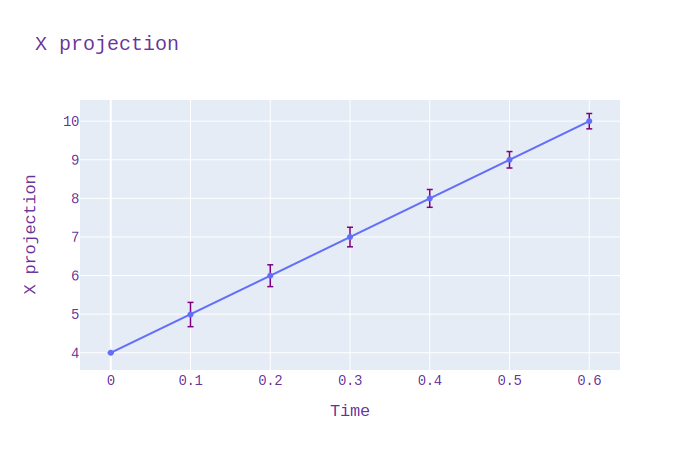

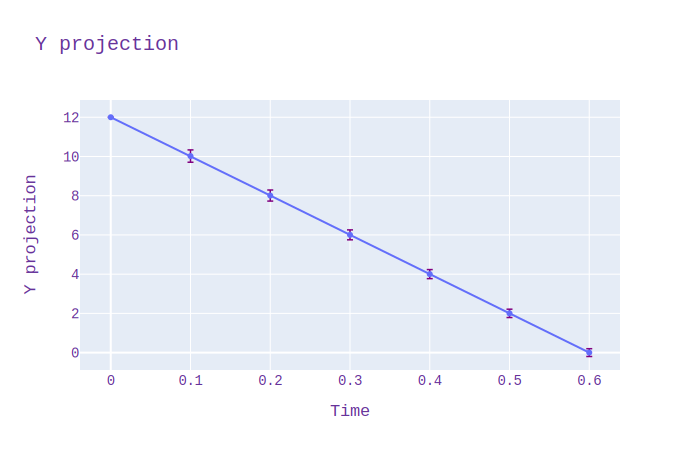

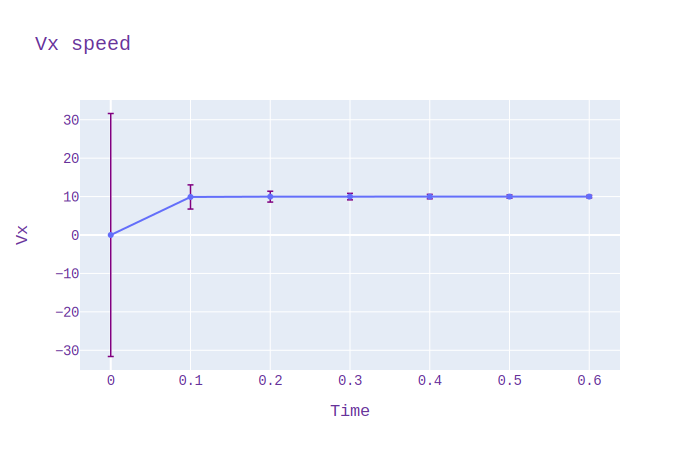

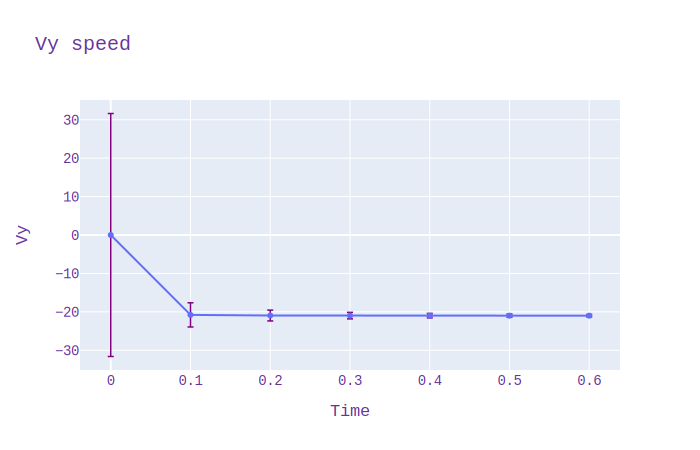

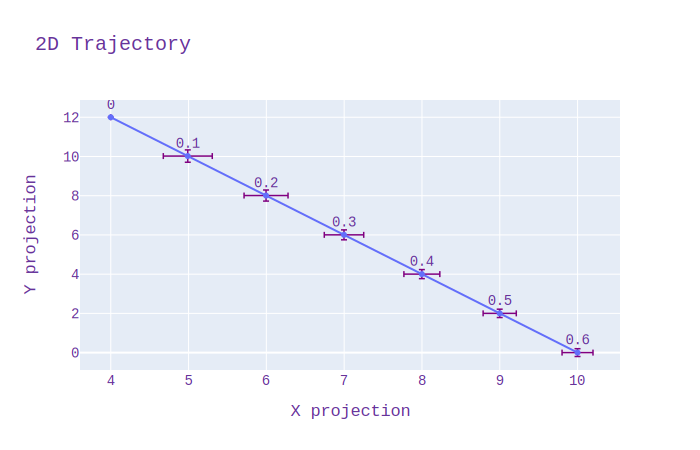

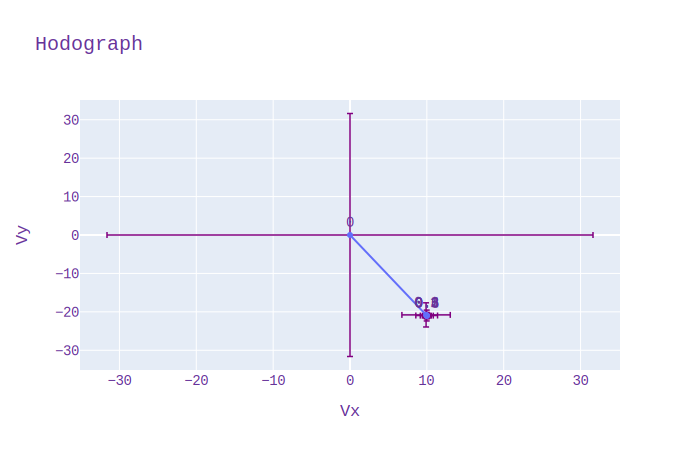

In [53]:
visualise_kalman(x_hist, E_hist)

Visualize the components of the $ K $ matrix below

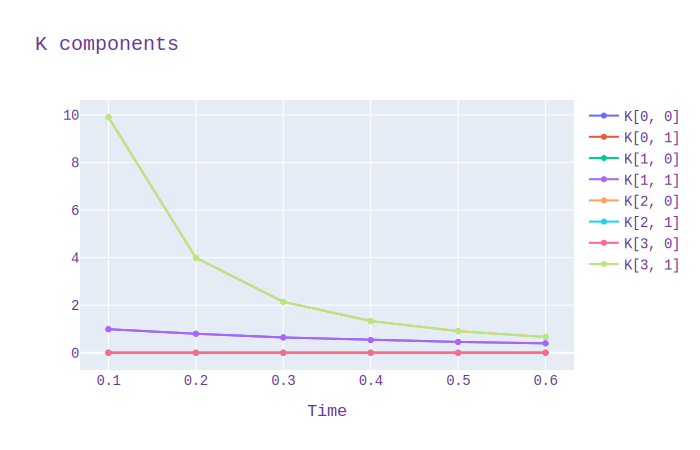

In [54]:
visualise_K(k_log)

## Second experiment

In [55]:
measurements = [[1.0, 4.0], [6.0, 0.0], [11.0, -4.0], [16.0, -8.0]]
initial_xy = [-4.0, 8.0]

dt = 0.1

# initial robot state (location and velocity)
x = np.array([[initial_xy[0]], [initial_xy[1]], [0.0], [0.0]])
# external motion applied to the robot
u = np.array([[0.0], [0.1], [0.0], [0.0]])

In [56]:
k_log, x_hist, E_hist = kalman_filter(x, E)

Visualize the dependence of $ x $, $ y $, $ V_x $, $ V_y $ over time

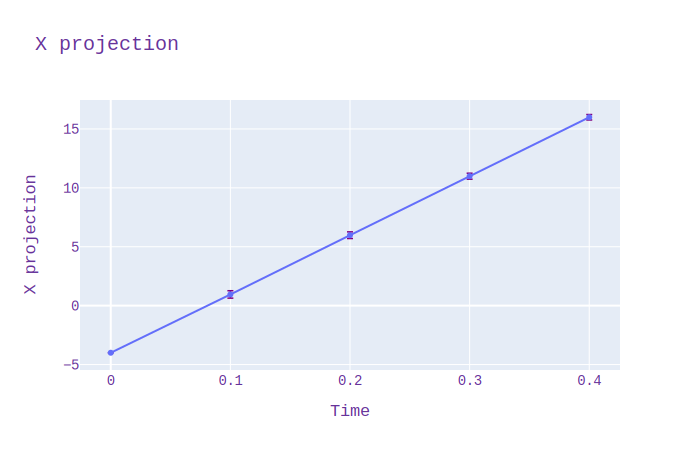

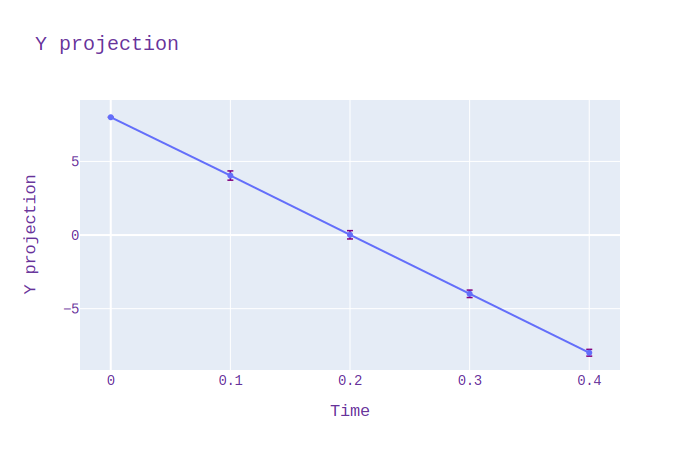

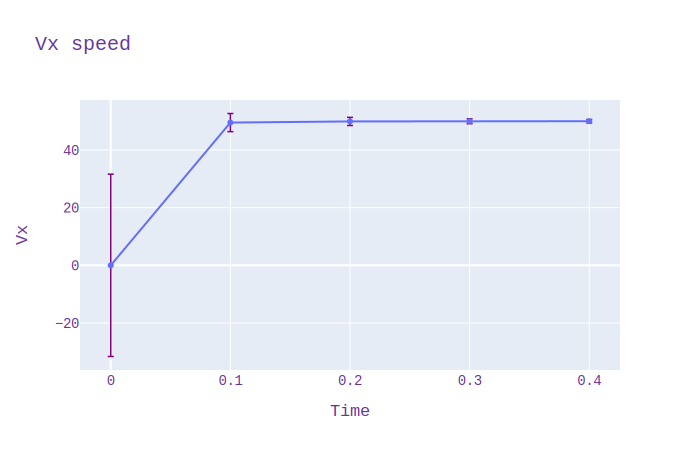

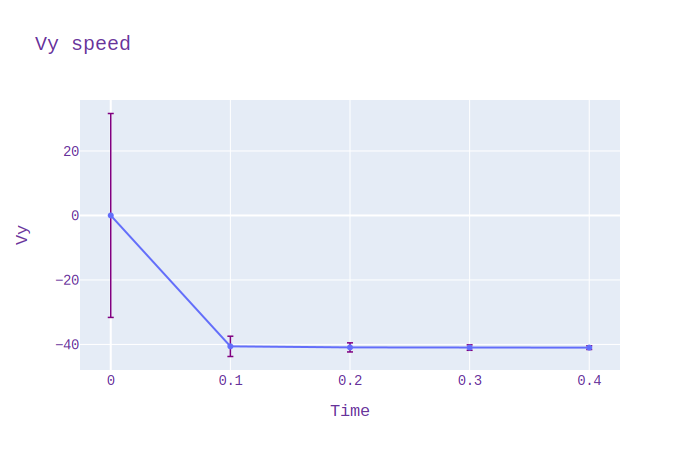

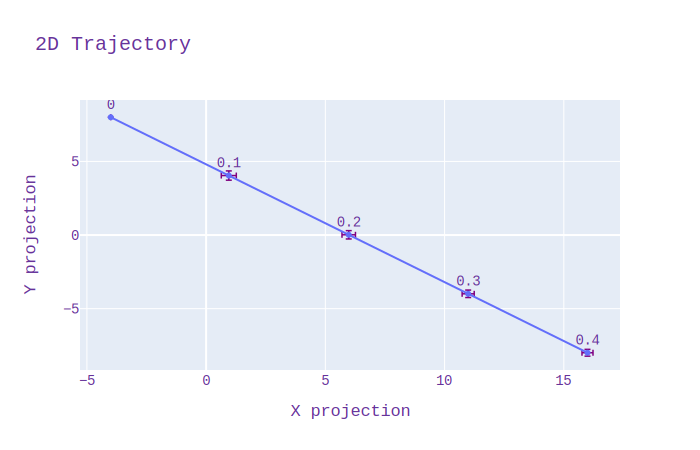

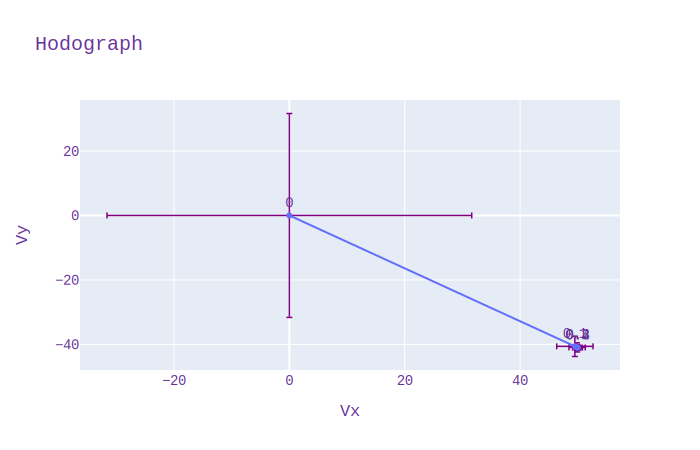

In [57]:
visualise_kalman(x_hist, E_hist)

Visualize the components of the $ K $ matrix below

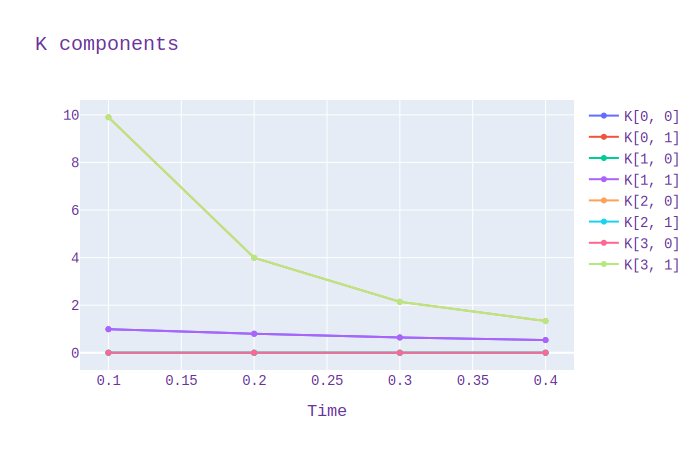

In [58]:
visualise_K(k_log)

## Third Experiment

In [59]:
measurements = [[1.0, 17.0], [1.0, 15.0], [1.0, 13.0], [1.0, 11.0]]
initial_xy = [1.0, 19.0]

dt = 0.1

# initial robot state (location and velocity)
x = np.array([[initial_xy[0]], [initial_xy[1]], [0.0], [0.0]])
# external motion applied to the robot
u = np.array([[0.0], [0.1], [0.0], [0.0]])

In [60]:
k_log, x_hist, E_hist = kalman_filter(x, E)

Visualize the dependence of $ x $, $ y $, $ V_x $, $ V_y $ over time

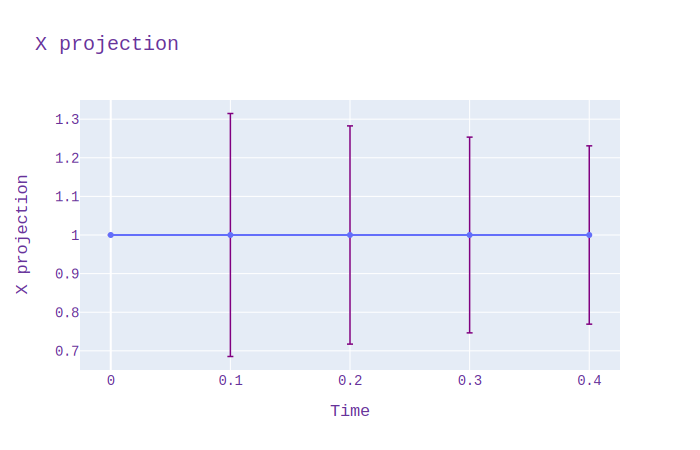

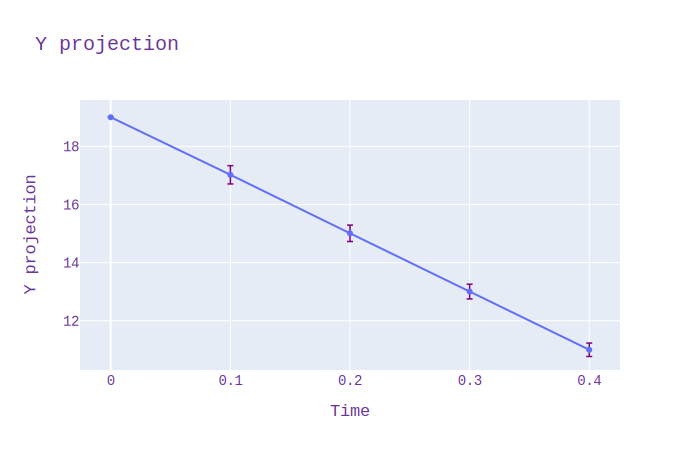

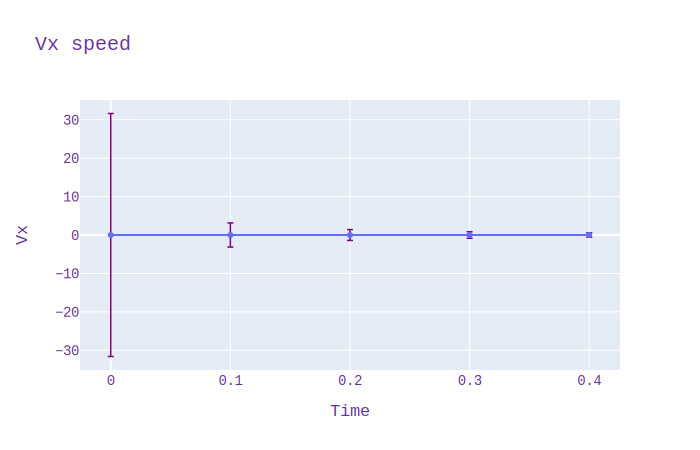

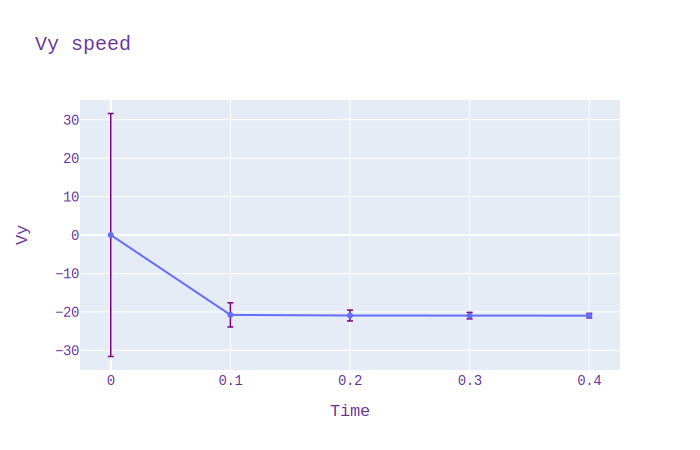

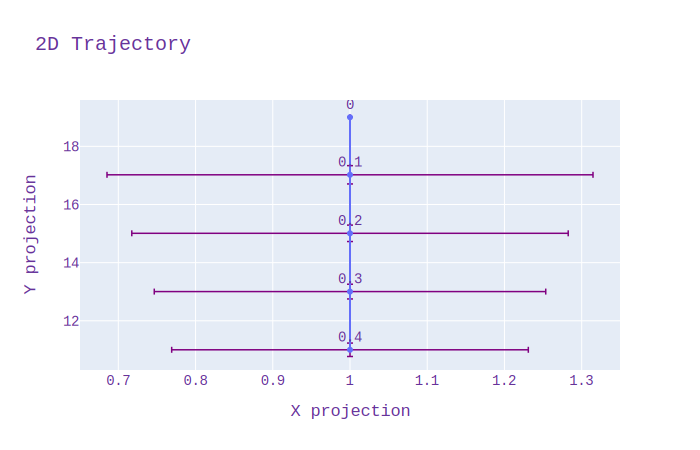

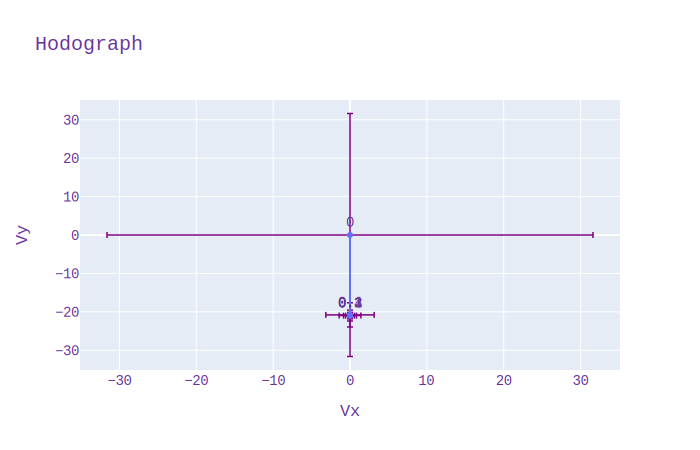

In [61]:
visualise_kalman(x_hist, E_hist)

Visualize the components of the $ K $ matrix below

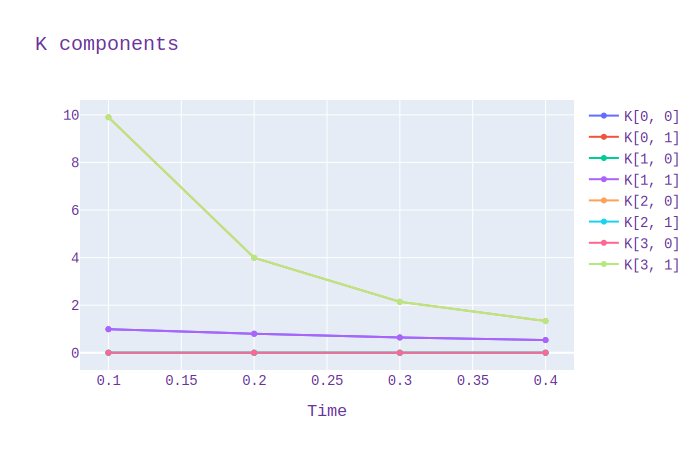

In [62]:
visualise_K(k_log)

## Conclusions

Don't forget to put your thoughts on the experiments above.

Questions to stimulate thoughts could be found in the beginning of the notebook =)

## Some thoughts about presented result

In general, variation of state space parameters is drastically decreasing while new accurate enough measurement are coming. Most of all it is about speed variations. Matrix $K$ components are also tends to converge some stable values. I suppose, it can be explained by several ideas. First of all in all three cases we see uniform motion with relatively small control action. Second, we have known and fixed dynamic model of the process what leads to relatively accurate forecast of state variables vector. As a result we have accurate forecast and low error measurement what allow us to increase speed estimation step by step.

Variance of coordinates is also decreasing although this process is not so impressive. It can be connected with the fact that it has relatively small values in the same beginning of the motion. In the first two experiments absolute value of coordinates is much bigger, then measurement error, so we observe small relative error. In the last experiment absolute value of X is small and we observe valuable error.